# <span style="color:darkblue"> QTM 151 - Quiz 2 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your name below

In [180]:
# Write your answer here
print("My name is Mike Wu")

My name is Mike Wu


<font size = "5" >
This quiz is open book 

- You can use the lecture notes
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Print the following message: <br>

"I will abide by Emory's code of conduct"


In [181]:
# Write your answer here:

print("I will abide by Emory's code of conduct")


I will abide by Emory's code of conduct


<font size = "5">

Import the libraries "numpy", "matplotlib.pyplot", <br>
"pandas", "statsmodels.api" and "statsmodels.formula.api"


In [182]:
# Write your answer here

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

<font size = "5">

Read the dataset "data_quiz/fifa23_players_basic.csv"

- It's a dataset on professional soccer players
- Rows correspond to players (18,539)
- Columns contain attributes of players (32)
- Try to view the dataset before starting <br>
to get a sense of its content

In [183]:
# Write your own code

profsoccer = pd.read_csv("data_quiz/fifa23_players_basic.csv")
print(profsoccer)


       Unnamed: 0        Known As           Full Name  Overall  Potential  \
0               0        L. Messi        Lionel Messi       91         91   
1               1      K. Benzema       Karim Benzema       91         91   
2               2  R. Lewandowski  Robert Lewandowski       91         91   
3               3    K. De Bruyne     Kevin De Bruyne       91         91   
4               4       K. Mbappé       Kylian Mbappé       91         95   
...           ...             ...                 ...      ...        ...   
18534       18534      D. Collins      Darren Collins       47         56   
18535       18535    Yang Dejiang        Dejiang Yang       47         57   
18536       18536       L. Mullan         Liam Mullan       47         67   
18537       18537    D. McCallion    Daithí McCallion       47         61   
18538       18538        N. Rabha         Nabin Rabha       47         50   

       Value(in Euro) Positions Played Best Position          Nationality  

<font size = "5">

(a) Use queries + global variables

<font size = "3">

- Subset the players whose value of the column "On Loan" is "YES" <br>
and store it in a new dataset
- How many players are on loan?

HINT: Remember that there is a special syntax for <br>
when the column names have spaces (see Lecture 10) <br>
and when the value is a string. <br>
Reference the column as ``` `On Loan` ``` inside .query()

In [184]:
# Write your own code

players_on_loan = profsoccer.query("`On Loan` == 'YES'")

# Count the number of players on loan
number_on_loan = len(players_on_loan)

# Display the number of players on loan
print(f"Number of players on loan: {number_on_loan}")




Number of players on loan: 1229


<font size = "5">

(b) Create a function and apply it to a column <br>

<font size = "3">

Step 1:
- Define a function with a parameter "Overall"
- If "Overall > 90", classification = "Top Performer"
- If "Overall <= 90", classification = "Non Top-Performer"
- The function returns "classification"

Step 2:
- Extract the column "Overall" in the dataset <br>
(be carefeful to write the "O" capitalized)
- Create a new variable called "player_classification" <br>
to assign each player to the correct classification

HINT: Use the ".apply()" function

In [185]:
# Write your own code

def classify_player(overall):
    if overall > 90:
        return "Top Performer"
    else:
        return "Non Top-Performer"


profsoccer['player_classification'] = profsoccer['Overall'].apply(classify_player)



<font size = "5">

(c) Use sorting + ".iloc[]"

<font size = "3">

The varable "Joined On" shows the date in which each player joined FIFA
- Use ".sort_values()" to order the "Joined On" column <br>
from earlier data to later date
- Get a subset with the 6 players in the dataset <br>
who joined FIFA earliest
- From this subset, display the year in which they joined <br>
by displaying the column "Joined On"

In [186]:
# Write your own code

fifa_data_sorted = profsoccer.sort_values("Joined On")

six_earliest_players = fifa_data_sorted.iloc[:6]

print(six_earliest_players[['Joined On']])


       Joined On
8586        2002
10877       2003
4324        2004
11056       2005
10360       2005
11768       2005


<font size = "5">

(d) Regression function

<font size = "3">

- Run a regression of "Potential" (left-hand side) on "Age" (right-hand side)
- What are the values of the coefficients?

[HINT: Use the commands ```smf.ols()``` and ```.fit()``` and ```.params``` <br>
from Lecture 11 ]


In [187]:
# Write your own code

result = smf.ols('Potential ~ Age', data=profsoccer).fit()

coefficients = result.params

print(coefficients)


Intercept    79.752454
Age          -0.346103
dtype: float64


<font size = "5">

(e) Split a dataset into subsets

<font size = "3">

- Store the total number of rows of the dataset in a variable called ```n``` <br>
- Create a new variable called ```random_var``` drawn from a <br>
uniform distribution between 0 and 1 with size ```n```
- Use .query() to subset all observations with ```random_var <0.5```.<br>
store it in a new dataset called "data0"
- Use .query() to subset all observations with ```random_var >= 0.5```.<br>
store it in a new dataset called "data1"

[HINT: See Lecture 2 for how to generate a uniform random variable]


In [188]:
# Write your own code

n = len(profsoccer)

random_var = np.random.uniform(0, 1, size=n)

profsoccer['random_var'] = random_var

data0 = profsoccer.query('random_var < 0.5')
data1 = profsoccer.query('random_var >= 0.5')


<font size = "5">

(f) Create two overlapping histogram plots

<font size = "3">

- This question requires the two datasets you created in (e)
- Display the distribution of "Age" for "data0" and "data1" using <br>
```plt.hist()```
- You will need to label the axes, and the title
- To get full points, plot the histograms with the option  ```alpha = 0.5```, e.g. <br>
 ``` plt.hist(x = ..., alpha = 0.5) ``` <br>
 Make sure to substitute the corresponding "x" vector instead of ```...``` <br>
(The alpha option sets the transparency of the histogram )

Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

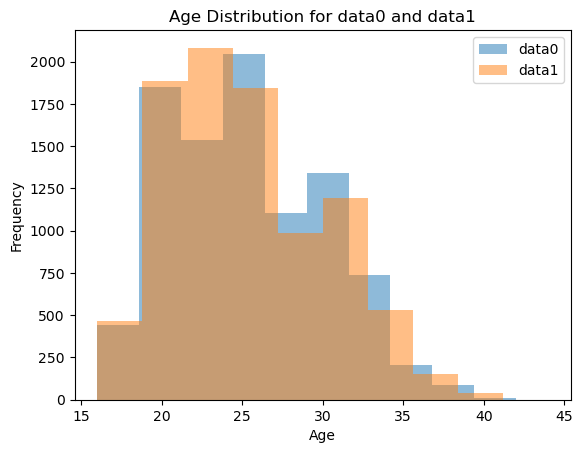

In [190]:
# Write your own code

plt.hist(x = data0['Age'], alpha=0.5, label='data0')

plt.hist(x = data1['Age'], alpha=0.5, label='data1')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution for data0 and data1')
plt.legend()
plt.show()




